<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/ChenshiLin/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
floor_image_id = os.listdir('/content/drive/MyDrive/images/CarpetOnTheFloor')[0]

In [ ]:
os.listdir('/content/drive/MyDrive/images/CarpetOnTheFloor')[0]

'carpetonthefloor0.jpeg'

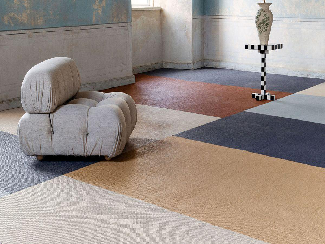

In [ ]:
floor_image_id = os.listdir('/content/drive/MyDrive/images/CarpetOnTheFloor')[0]
floor_path = os.path.join('/content/drive/MyDrive/images/CarpetOnTheFloor', floor_image_id)
floor_image = load_image(floor_path)

tf.keras.preprocessing.image.load_img(floor_path, target_size=(244,325))

In [ ]:
print(f'shape:{floor_image.shape}')
print(f'type:{type(floor_image)}')

shape:(1, 224, 224, 3)
type:<class 'numpy.ndarray'>


In [ ]:
model.predict(floor_image)

1/1 [==============================] - 1s 883ms/step


array([[2.14454417e-07, 6.09545623e-07, 3.36522618e-07, 2.01848209e-07,
        1.36237225e-06, 3.45451838e-07, 2.83932172e-06, 1.97649285e-07,
        5.01311092e-07, 4.68346286e-07, 1.11382441e-07, 4.21785302e-07,
        3.89600615e-07, 2.15873541e-07, 2.86820568e-06, 1.22359131e-06,
        3.92226048e-06, 2.04267167e-06, 8.42732697e-06, 1.44097530e-05,
        4.55479693e-07, 2.46997409e-08, 1.55091286e-07, 5.31509414e-08,
        4.44867823e-07, 5.76712296e-07, 1.56990779e-06, 2.77417871e-06,
        1.00575528e-06, 4.56665157e-06, 5.50526096e-08, 2.28465115e-06,
        1.40299690e-07, 1.04886635e-06, 6.23958113e-06, 3.63764656e-07,
        1.60536933e-06, 4.94776998e-07, 4.58252725e-06, 5.04164746e-07,
        2.48602362e-07, 3.28415325e-07, 5.68585563e-07, 4.73900428e-07,
        4.67942698e-07, 1.57052255e-05, 4.24320575e-07, 3.17209754e-07,
        2.41384578e-06, 1.13846736e-08, 1.74149216e-06, 4.18634454e-06,
        9.58888704e-05, 7.20963271e-07, 2.48131369e-06, 1.546513

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(floor_image).shape

1/1 [==============================] - 0s 494ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images', 
    target_size=(224, 325),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/images',
    target_size=(224, 325),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 349 images belonging to 4 classes.
Found 37 images belonging to 4 classes.


In [ ]:
batch_size = 16

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=1,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
    )

11/21 [==============>...............] - ETA: 1:16 - loss: 1.5786

21/21 [==============================] - 99s 4s/step - loss: 1.5786 - val_loss: 1.1841


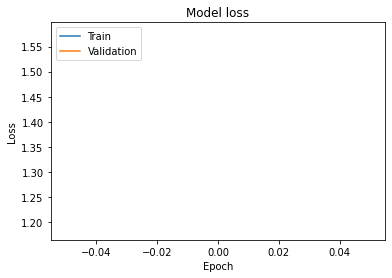

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
random_floor = random.choice(os.listdir('/content/drive/MyDrive/images/CarpetOnTheFloor'))
floor_path = os.path.join('/content/drive/MyDrive/images/CarpetOnTheFloor',random_floor)
floor = load_image(floor_path)
random_wall = random.choice(os.listdir('/content/drive/MyDrive/images/CarpetOnTheWall'))
wall_path = os.path.join('/content/drive/MyDrive/images/CarpetOnTheWall',random_wall)
wall = load_image(wall_path)
random_rooftop = random.choice(os.listdir('/content/drive/MyDrive/images/CarpetOnTheRooftop'))
rooftop_path = os.path.join('/content/drive/MyDrive/images/CarpetOnTheRooftop',random_rooftop)
rooftop = load_image(rooftop_path)
random_upstairs = random.choice(os.listdir('/content/drive/MyDrive/images/CarpetOnTheUpstairs'))
upstairs_path = os.path.join('/content/drive/MyDrive/images/CarpetOnTheUpstairs',random_upstairs)
upstairs = load_image(upstairs_path)

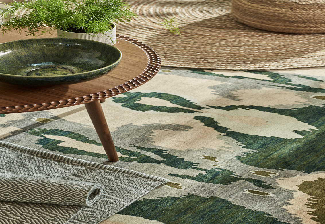

In [ ]:
tf.keras.preprocessing.image.load_img(floor_path, target_size=(224,325))

In [ ]:
print(f'''floor:{np.round(model.predict(floor),2)}''')

1/1 [==============================] - 1s 580ms/step
floor:[[0.54 0.06 0.11 0.29]]


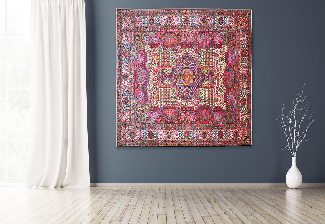

In [ ]:
tf.keras.preprocessing.image.load_img(wall_path, target_size=(224,325))

In [ ]:
print(f'''wall:{np.round(model.predict(wall),2)}''')

1/1 [==============================] - 0s 62ms/step
wall:[[0.09 0.08 0.27 0.56]]


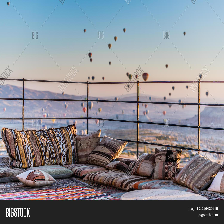

In [ ]:
tf.keras.preprocessing.image.load_img(rooftop_path, target_size=(224,224))

In [ ]:
print(f'''picnic:{np.round(model.predict(rooftop),2)}''')

1/1 [==============================] - 0s 235ms/step
picnic:[[0.06 0.27 0.62 0.06]]


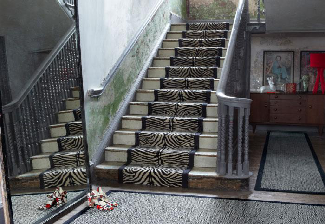

In [ ]:
tf.keras.preprocessing.image.load_img(upstairs_path, target_size=(224,325))

In [ ]:
print(f'''magic:{np.round(model.predict(upstairs),2)}''')

1/1 [==============================] - 0s 70ms/step
magic:[[0.06 0.08 0.33 0.54]]
